<a href="https://colab.research.google.com/github/StefanoSassy/Riesgo-y-portafolio/blob/main/Riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis de riesgo y rendimiento de portafolio.

En este proyecto analizaremos, usando herramientas elementales de estadistica y finanzas, una base de datos e inversiones. Queremos calcular el rendimiento de las acciones y predecir el comportamiento futuro de este portafolio de inversi√≥n. La base de datos la descargaremos de Kaggle, espec√≠ficamente: https://www.kaggle.com/datasets/abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns?utm_source=chatgpt.com

Otro objetivo importante para la industria es la creaci√≥n de gr√°ficas interactivas. Tambi√©n nos efocaremos en presentar buenas gr√°ficas para describir los datos.
Como siempre empezamos extrayendo los datos directamente de la fuente.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns")

print("Path to dataset files:", path)
#Este c√≥digo nos lo da directamente la p√°gina de Kaggle en el boton "Download".

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17.1k/17.1k [00:00<00:00, 19.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns/versions/1


Creemos el data frame.

In [2]:
import os

carpeta = "/root/.cache/kagglehub/datasets/abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns/versions/1"
print(os.listdir(carpeta))


['faang_stocks.csv']


In [3]:
import pandas as pd

ruta = "/root/.cache/kagglehub/datasets/abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns/versions/1/faang_stocks.csv"

# Cargar el dataset
df = pd.read_csv(ruta)

# Mostrar las primeras filas
print(df.head())


         Date   AAPL   AMZN  GOOGL    META    NFLX
0  2020-01-02  75.09  94.90  68.43  209.78  329.81
1  2020-01-03  74.36  93.75  68.08  208.67  325.90
2  2020-01-06  74.95  95.14  69.89  212.60  335.83
3  2020-01-07  74.60  95.34  69.76  213.06  330.75
4  2020-01-08  75.80  94.60  70.25  215.22  339.26


Ya descargada la base de datos necesitamos checar como siempre el tipo de datos y los valores nulos.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   AAPL    1006 non-null   float64
 2   AMZN    1006 non-null   float64
 3   GOOGL   1006 non-null   float64
 4   META    1006 non-null   float64
 5   NFLX    1006 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.3+ KB
None


Los √∫nicos datos que nos puede llegar a molestar es la fecha, hay varias opciones, lo primero es convertir el dato a fecha, lo segundo es el formato de la fecha que mas se nos acomoda, muchas veces depende de la empresa que quiera hacer dicho ann√°lisis.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


Notes√© que las fechas ahora son √≠ndices, esto es util para series temporales o comparar datos un rango de fechas.

In [6]:
print(df.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


## An√°lisis de Riesgo

Empecemos a gr√°ficar, lo "divertido" de las siguientes gr√°ficas es que son muy parecidas a las gr√°ficas que vienen de las aplicaciones de la bolsa de valores.

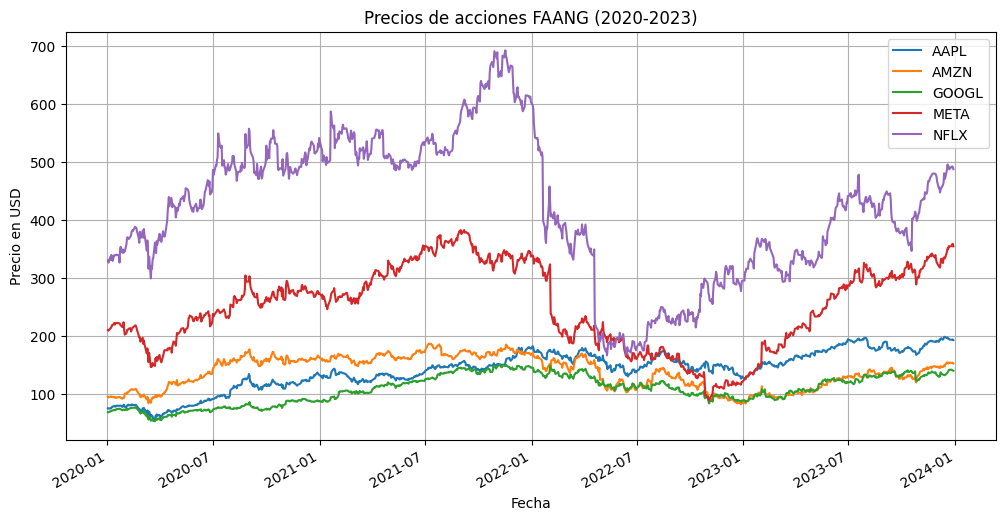

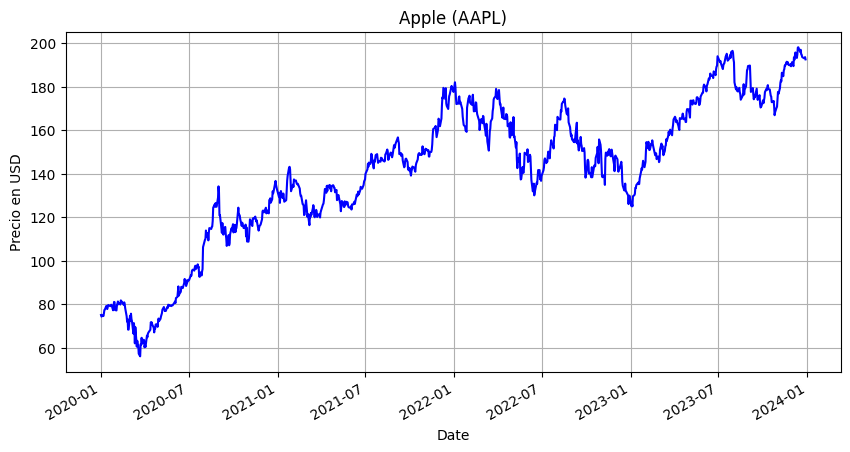

In [7]:
import matplotlib.pyplot as plt

df.plot(figsize=(12, 6), title='Precios de acciones FAANG (2020-2023)')
plt.ylabel('Precio en USD')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

df['AAPL'].plot(figsize=(10, 5), title='Apple (AAPL)', color='blue')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.show()

Aveces queremos que la gr√°fica sea mas interactiva, veamos un ejemplo. Notes√© como el cursor nos dara informaci√≥n diaria sobre el comportamiento de los datos. Otro de los objetivos es subir este proyecto a nuestro GitHub personal desde Colab, por eso necesitaremos instalar una nueva paqueter√≠a.

In [8]:
import plotly.express as px #Para gr√°ficas interactivas
import plotly.io as pio # Para guardar gr√°ficas interactivas
#from google.colab import files #Para descargar gr√°ficas interactivas desde Colab


fig = px.line(df, title='Precios de acciones FAANG (interactivo)')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Precio en USD')
fig.show()

fig.write_html("plotly_graph.html")



El siguiente ejemplo es preparar la gr√°fica para un dashboard o aplicaci√≥n y poder interactuar con ella en una p√°gina web que vayamos a crear.

In [9]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
output_notebook()

p = figure(title="Acciones FAANG", x_axis_type='datetime', width=900, height=400)
colors = Category10[5]
for i, col in enumerate(df.columns):
    p.line(df.index, df[col], legend_label=col, color=colors[i])

p.legend.location = "top_left"
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Precio en USD'
show(p)

## An√°lisis estadistico con respecto del tiempo.

Si uno se encuentra con un proyecto de este estilo, refiriendome a que podemos hacer el an√°lisis con respecto del tiempo, lo ideal es conseguir todos los valores que varian con respecto a los d√≠as, si los datos tiene "horas", dependiendo del proyecto y la necesidad, es recomendable hacer ambos an√°lisis.

Emepcemos por los mas sencillos, el rendimiento promedio, la desviaci√≥n estandar diaria (muy com√∫n en el an√°lisis de riesgo) y un poco mas espec√≠fico el rendimiento diario.

$$\text{Rendimiento diario}=\frac{\text{Precio en el dia actual - Precio en el dia anterior
}}{\text{Precio del dia anterior}}\times 100.$$

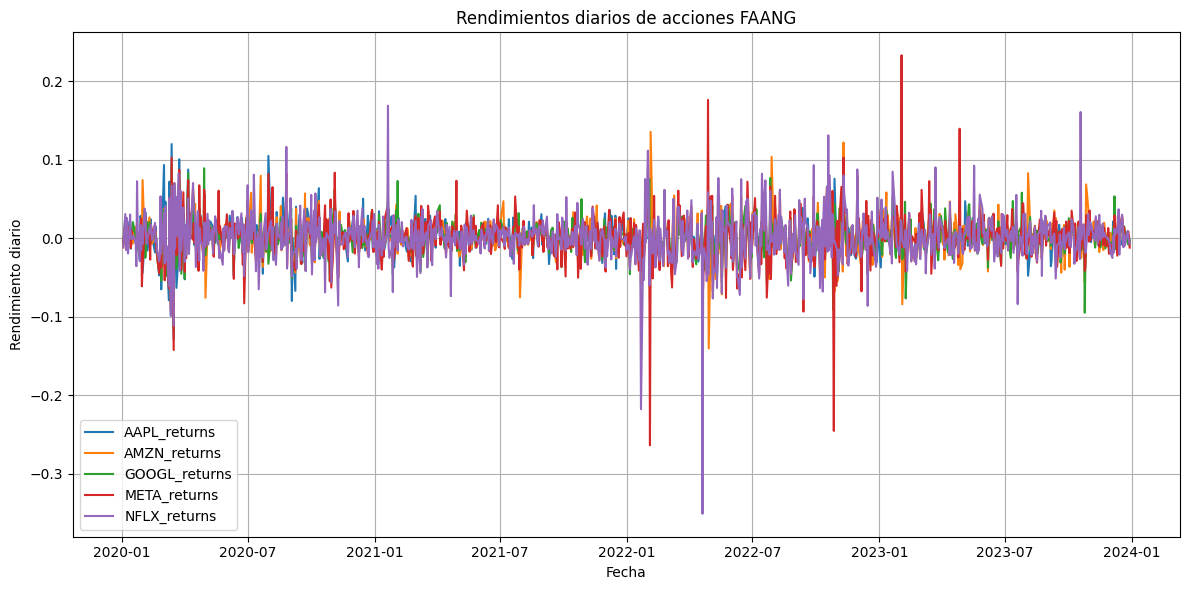

In [10]:
#Rendimientos diarios
df['AAPL_returns'] = df['AAPL'].pct_change()
df['AMZN_returns'] = df['AMZN'].pct_change()
df['GOOGL_returns'] = df['GOOGL'].pct_change()
df['META_returns'] = df['META'].pct_change()
df['NFLX_returns'] = df['NFLX'].pct_change()

empresas = ['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']

plt.figure(figsize=(12, 6))

for empresa in empresas:
    plt.plot(df.index, df[empresa], label=empresa)

plt.title("Rendimientos diarios de acciones FAANG")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento diario")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Guardar como imagen para usar en GitHub
plt.savefig("rendimientos_diarios_FAANG.png", dpi=300)
plt.show()

Aqu√≠ est√° el c√≥digo para la misma gr√°fica pero interactiva.

In [11]:

#Graficamos los rendimientos diarios
import plotly.graph_objects as go

fig = go.Figure()

# Lista de empresas y colores opcionales
empresas = ['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']
for empresa in empresas:
    fig.add_trace(go.Scatter(x=df.index, y=df[empresa], mode='lines', name=empresa))

fig.update_layout(
    title="Rendimientos diarios de acciones FAANG (interactivo)",
    xaxis_title="Fecha",
    yaxis_title="Rendimiento diario",
    hovermode="x unified",
    template="plotly_white",
    height=600
)

fig.show()
#Notemos que la gr√°fica es bastante "interactiva" pues nos permite seleccionar que color o colores queremos observar.

Veamos la desviaciones estadar gr√°ficamente.

AAPL_returns: 0.0211
AMZN_returns: 0.0237
GOOGL_returns: 0.0211
META_returns: 0.0295
NFLX_returns: 0.0307


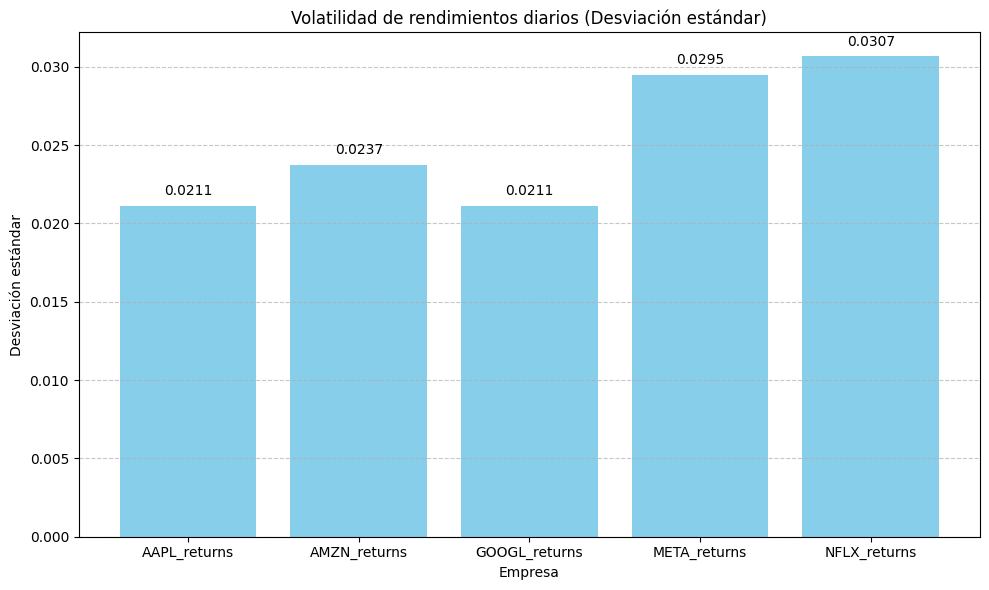

In [12]:
stds = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].std()

for col, std in stds.items():
    print(f"{col}: {std:.4f}")

stds_df = stds.reset_index()
stds_df.columns = ['Empresa', 'Desviaci√≥n Est√°ndar']

plt.figure(figsize=(10, 6))

# Gr√°fica de barras
plt.bar(stds_df['Empresa'], stds_df['Desviaci√≥n Est√°ndar'], color='skyblue')

# A√±adir texto encima de cada barra
for i, val in enumerate(stds_df['Desviaci√≥n Est√°ndar']):
    plt.text(i, val + 0.0005, f'{val:.4f}', ha='center', va='bottom')

# Est√©tica del gr√°fico
plt.title('Volatilidad de rendimientos diarios (Desviaci√≥n est√°ndar)')
plt.xlabel('Empresa')
plt.ylabel('Desviaci√≥n est√°ndar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar imagen
plt.savefig('volatilidad_rendimientos_diarios.png', dpi=300)
plt.show()

In [13]:
#La gr√°fica anterior pero interactiva.
fig = px.bar(
    stds_df,
    x='Empresa',
    y='Desviaci√≥n Est√°ndar',
    title='Volatilidad de rendimientos diarios (Desviaci√≥n est√°ndar)',
    text='Desviaci√≥n Est√°ndar',
    template='plotly_white'
)
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.show()

Para ser todav√≠a mas interactivos cons las gr√°ficas podemos incluir la media vs la desviaci√≥n estandar. Usamos una media m√≥vil (rolling mean) y desviaci√≥n est√°ndar m√≥vil para que se actualicen con el tiempo

In [14]:
avg_returns = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].mean()

for col, avg in avg_returns.items():
    print(f"{col}: {avg:.4f}")

AAPL_returns: 0.0012
AMZN_returns: 0.0007
GOOGL_returns: 0.0009
META_returns: 0.0010
NFLX_returns: 0.0009


In [15]:
window = 30  # n√∫mero de d√≠as para calcular las bandas
df['AAPL_mean'] = df['AAPL_returns'].rolling(window).mean()
df['AAPL_std'] = df['AAPL_returns'].rolling(window).std()

df['AAPL_upper'] = df['AAPL_mean'] + df['AAPL_std']
df['AAPL_lower'] = df['AAPL_mean'] - df['AAPL_std']

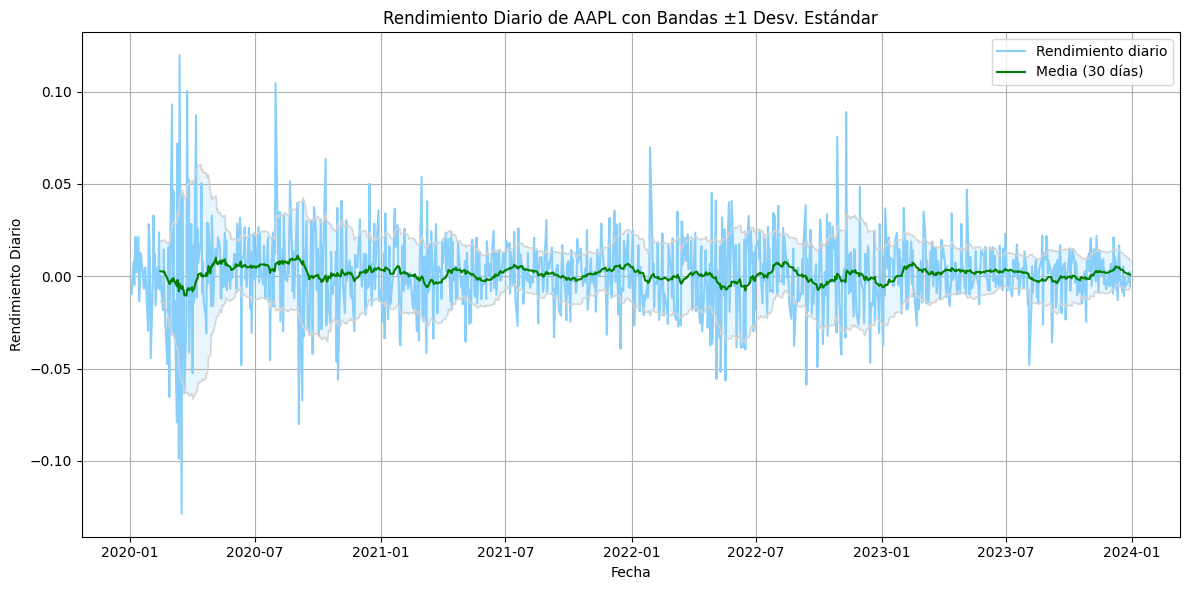

In [16]:
plt.figure(figsize=(12, 6))

# L√≠nea de rendimiento diario
plt.plot(df.index, df['AAPL_returns'], label='Rendimiento diario', color='lightskyblue')

# L√≠nea de la media m√≥vil de 30 d√≠as
plt.plot(df.index, df['AAPL_mean'], label='Media (30 d√≠as)', color='green')

# Bandas superior e inferior
plt.plot(df.index, df['AAPL_upper'], color='lightgray', linewidth=1)
plt.plot(df.index, df['AAPL_lower'], color='lightgray', linewidth=1)
plt.fill_between(df.index, df['AAPL_lower'], df['AAPL_upper'], color='lightskyblue', alpha=0.2)

# Est√©tica
plt.title('Rendimiento Diario de AAPL con Bandas ¬±1 Desv. Est√°ndar')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Diario')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Guardar imagen
plt.savefig('rendimiento_AAPL_bandas.png', dpi=300)
plt.show()

In [17]:
#La correspondiente gr√°fica interactiva.
fig = go.Figure()

# L√≠nea del rendimiento diario
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_returns'],
    mode='lines', name='Rendimiento diario',
    line=dict(color='lightskyblue')
))

# Media m√≥vil
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_mean'],
    mode='lines', name='Media (30 d√≠as)',
    line=dict(color='green')
))

# Banda superior
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_upper'],
    mode='lines', name='+1 Desv. Est√°ndar',
    line=dict(color='lightgray'),
    showlegend=False
))

# Banda inferior
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_lower'],
    mode='lines', name='-1 Desv. Est√°ndar',
    line=dict(color='lightgray'),
    fill='tonexty',  # relleno entre las bandas
    fillcolor='rgba(173,216,230,0.2)',  # azul claro semi-transparente
    showlegend=False
))

fig.update_layout(
    title='Rendimiento Diario de AAPL con Bandas ¬±1 Desv. Est√°ndar',
    xaxis_title='Fecha',
    yaxis_title='Rendimiento Diario',
    template='plotly_white'
)

fig.show()

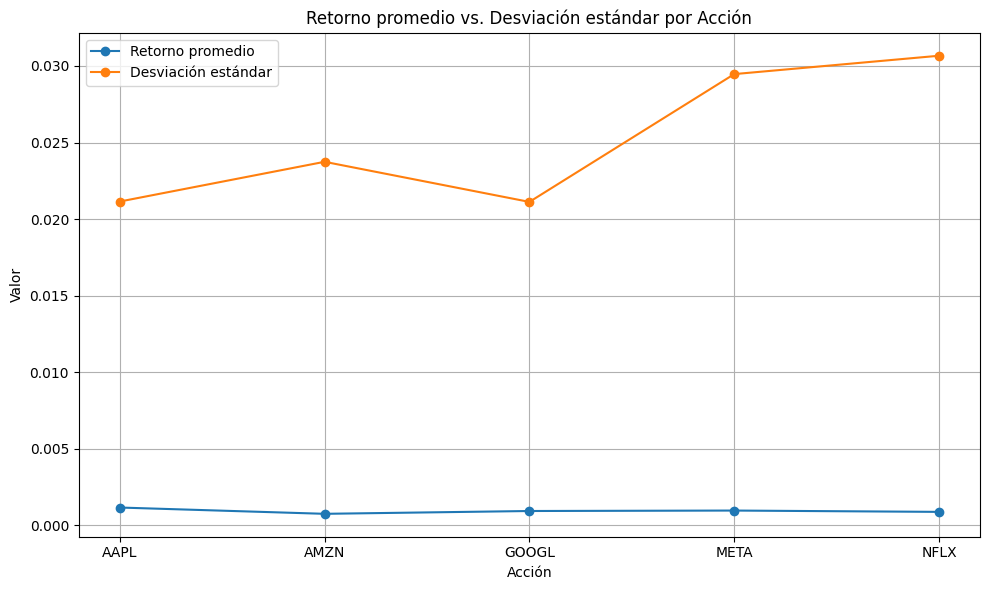

<ipython-input-18-eaf01d87d390>:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



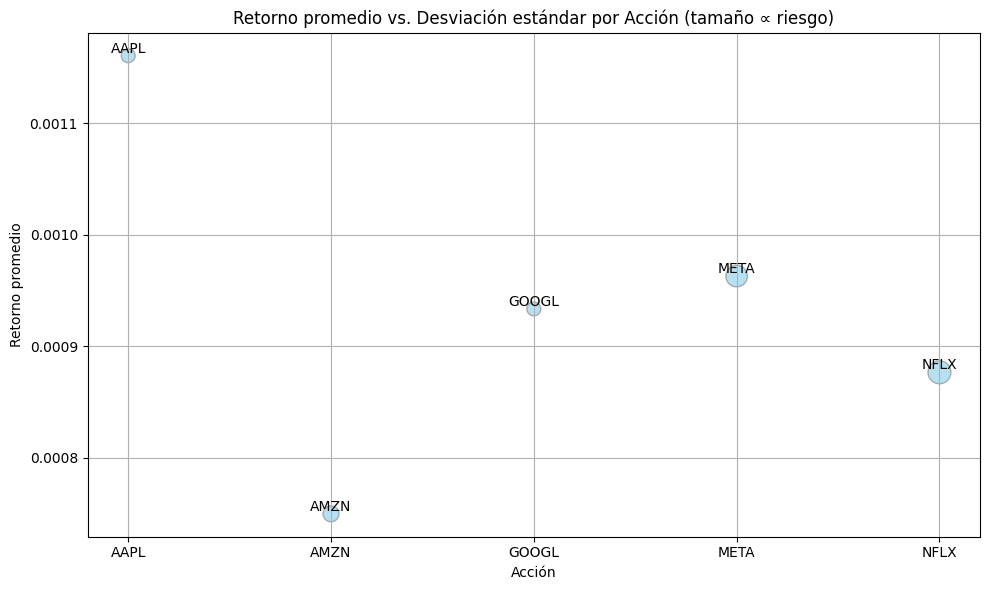

In [18]:
import numpy as np

stocks = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']

plt.figure(figsize=(10, 6))
plt.plot(stocks, avg_returns, marker='o', label='Retorno promedio')
plt.plot(stocks, stds, marker='o', label='Desviaci√≥n est√°ndar')

plt.title('Retorno promedio vs. Desviaci√≥n est√°ndar por Acci√≥n')
plt.xlabel('Acci√≥n')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('retorno_vs_volatilidad.png', dpi=300)
plt.show()

min_std, max_std = min(stds), max(stds)
normalized_stds = [(std - min_std) / (max_std - min_std) for std in stds]
scaled_stds = [np.exp(std) * 100 for std in normalized_stds]  # Factor de escala para mejor visualizaci√≥n

plt.figure(figsize=(10, 6))
plt.scatter(stocks, avg_returns, s=scaled_stds, alpha=0.6, c='skyblue', edgecolors='gray')

for i, txt in enumerate(stocks):
    plt.text(stocks[i], avg_returns[i], txt, ha='center', va='bottom')

plt.title('Retorno promedio vs. Desviaci√≥n est√°ndar por Acci√≥n (tama√±o ‚àù riesgo)')
plt.xlabel('Acci√≥n')
plt.ylabel('Retorno promedio')
plt.grid(True)
plt.tight_layout()
plt.savefig('retorno_vs_volatilidad_tamano.png', dpi=300)
plt.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=stocks, y=avg_returns, mode='lines+markers', name='Retorno prom'))
fig.add_trace(go.Scatter(x=stocks, y=stds, mode='lines+markers', name='Desviaci√≥n est'))

fig.update_layout(title='Retorno promedio vs. Desviaci√≥n est√°ndar por Acci√≥n',
                  xaxis_title='Acci√≥n', yaxis_title='Valor', legend_title='Metricas')
fig.show()

# Normalizar las desviaciones est√°ndar entre 0 y 1
min_std, max_std = min(stds), max(stds)
normalized_stds = [(std - min_std) / (max_std - min_std) for std in stds]

# Aplicar una transformaci√≥n exponencial para ampliar diferencias
scaled_stds = [np.exp(std) for std in normalized_stds]  # Ajusta el factor si es necesario

fig = px.scatter(x=stocks, y=avg_returns, size=scaled_stds, title='Retorno promedio vs. Desviaci√≥n est√°ndar por Acci√≥n',
                 labels={'x': 'Acci√≥n', 'y': 'Retorno prom'}, hover_name=stocks)
fig.show()


¬øQu√© est√°n mostrando las gr√°ficas? La primera simplemente esta gr√°ficando el promedio de los rendimientos diarios contra la desviaci√≥n estandar de los rendimientos diarios. En la segunda gr√°fica se hicieron mas operaci√≥n, es claro que en el eje $x$ est√°n las acciones, en el $y$ est√° el promedio y el tama√±o de los puntos representa la desviaci√≥n, pero como las desviaciones de las acciones no est√°n muy diferenciadas entre s√≠, las normalizamos y aplicamos una funci√≥n exponencial para que la diferencia del tama√±o sea mas notorio. Cuidado con este manejo, hay que tenerlo encuenta antes de compartir o presentar el an√°lisis de los datos.   

## Algunas conclusiones

**An√°lisis de Volatilidad**

La desviaci√≥n est√°ndar nos indica qu√© tan dispersos est√°n los rendimientos diarios alrededor del promedio. Las acciones con mayor desviaci√≥n est√°ndar tienen m√°s variabilidad en sus rendimientos, lo que sugiere un mayor riesgo.
*  Acci√≥n m√°s vol√°til: NFLX (0.0307), seguida de META (0.0295). Esto implica
   que sus rendimientos fluct√∫an m√°s, lo que puede significar oportunidades de alto retorno, pero tambi√©n mayor riesgo.
*  Acci√≥n menos vol√°til: AAPL y GOOGL (0.0211), lo que sugiere mayor
   estabilidad en los rendimientos.
*  Rangos cercanos: Las desviaciones est√°ndar est√°n relativamente cerca unas  
   de otras, lo que significa que, aunque algunas empresas sean m√°s vol√°tiles, la diferencia no es extrema.

**Relaci√≥n con los Retornos Promedio**

* Los retornos promedio de todas las acciones son bajos, lo que indica que,
  aunque haya fluctuaciones diarias, el rendimiento neto tiende a ser estable y peque√±o.

* NFLX y META, con mayor volatilidad, no muestran un rendimiento
  significativamente mayor, lo que sugiere que su riesgo podr√≠a no estar compensado por un retorno proporcionalmente m√°s alto.


## **Distribuciones**

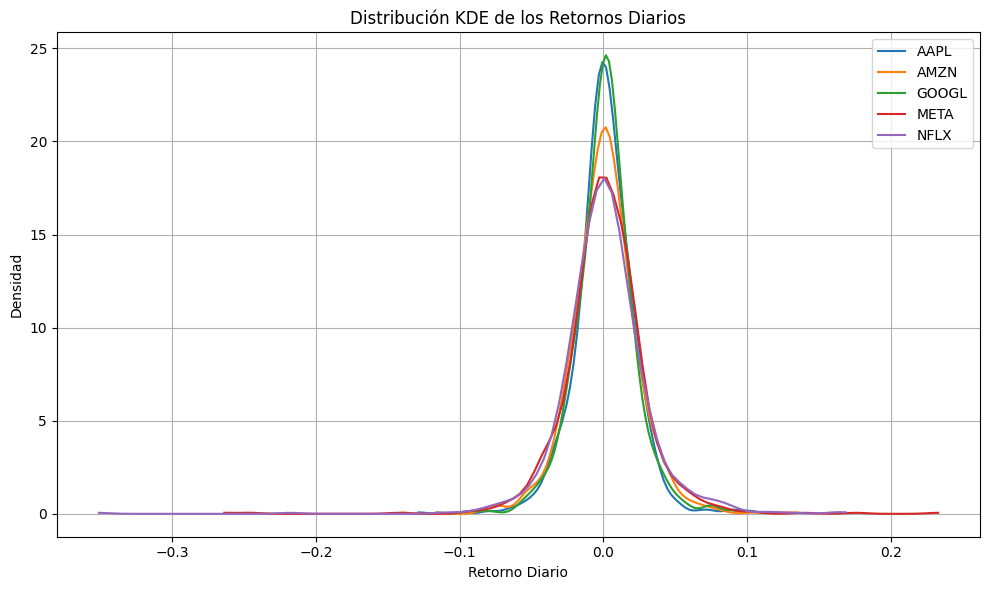

In [20]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6))

# Diccionario de retornos (usando df existente)
returns_data = {
    "AAPL": df["AAPL_returns"].dropna(),
    "AMZN": df["AMZN_returns"].dropna(),
    "GOOGL": df["GOOGL_returns"].dropna(),
    "META": df["META_returns"].dropna(),
    "NFLX": df["NFLX_returns"].dropna()
}

# Trazar cada curva KDE
for stock, data in returns_data.items():
    if len(data) > 1:
        kde = gaussian_kde(data)
        kde_x = np.linspace(min(data), max(data), 100)
        kde_y = kde(kde_x)
        plt.plot(kde_x, kde_y, label=stock)

plt.title("Distribuci√≥n KDE de los Retornos Diarios")
plt.xlabel("Retorno Diario")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("kde_retornos_diarios.png", dpi=300)
plt.show()

In [21]:
fig = go.Figure()

# Generar la KDE corregida para cada acci√≥n
for stock, data in returns_data.items():
    if len(data) > 1:  # Evita errores si la serie es demasiado corta
        kde = gaussian_kde(data)  # Modelo KDE
        kde_x = np.linspace(min(data), max(data), 100)  # Rango de valores
        kde_y = kde(kde_x)  # Densidad estimada

        fig.add_trace(go.Scatter(x=kde_x, y=kde_y, mode='lines', name=stock))

# Configuraci√≥n del gr√°fico
fig.update_layout(title="Distribuci√≥n KDE de los Retornos Diarios (Interactiva)",
                  xaxis_title="Retorno Diario",
                  yaxis_title="Densidad",
                  legend_title="Acciones",
                  hovermode="x unified")

fig.show()

Las "campanas" nos permiten ver c√≥mo se distribuyen los datos y qu√© tan concentrados o dispersos est√°n los rendimientos diarios. Si alguna acci√≥n tiene una curva m√°s ancha, significa mayor variabilidad en sus retornos, mientras que las m√°s estrechas indican estabilidad.

## **Correlaci√≥n**

Finalmente, veamos si hay correlaci√≥n de la primer gr√°fica (Precios de las acciones), podemos observar que s√≠ habr√° correlaci√≥n, pues muchas las acciones se comportan parecido, algunas crecen mas que otras, pero se observa que crecen y decrecen al mismo tiempo.

               AAPL_returns  AMZN_returns  GOOGL_returns  META_returns  \
AAPL_returns       1.000000      0.623860       0.690990      0.607307   
AMZN_returns       0.623860      1.000000       0.664295      0.613075   
GOOGL_returns      0.690990      0.664295       1.000000      0.681972   
META_returns       0.607307      0.613075       0.681972      1.000000   
NFLX_returns       0.475899      0.555095       0.467006      0.513583   

               NFLX_returns  
AAPL_returns       0.475899  
AMZN_returns       0.555095  
GOOGL_returns      0.467006  
META_returns       0.513583  
NFLX_returns       1.000000  


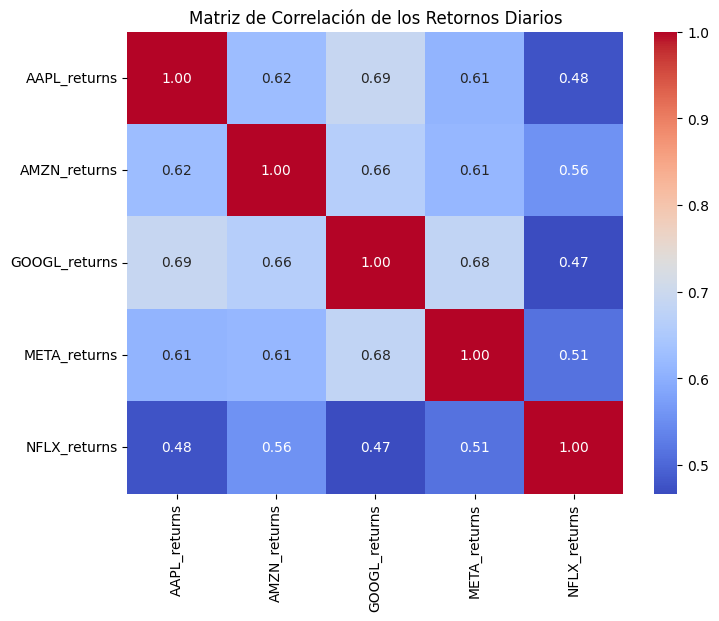

In [22]:
import seaborn as sns

# Calcular la matriz de correlaci√≥n
correlation_matrix = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].corr()
print(correlation_matrix)
# Crear la figura
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaci√≥n de los Retornos Diarios")
plt.show()

üîπ **An√°lisis de Correlaci√≥n**

1. Alta correlaci√≥n positiva ($\geq$ 0.60)

 * AAPL, AMZN, GOOGL y META tienen correlaciones bastante altas entre s√≠ (~0.
   60-0.70). Esto sugiere que sus movimientos suelen estar alineados, probablemente debido a factores macroecon√≥micos y su participaci√≥n en el sector tecnol√≥gico.

 * La relaci√≥n m√°s fuerte es entre AAPL-GOOGL (0.69) y GOOGL-META (0.68), lo    que indica que estas dos empresas tienen din√°micas de precio muy similares.

2. Correlaci√≥n moderada (~0.50)

 * NFLX muestra menor correlaci√≥n con las dem√°s (entre ~0.47 y ~0.55). Esto significa que sus movimientos no siempre siguen la misma tendencia que el resto de las empresas tecnol√≥gicas.

 * La menor correlaci√≥n es entre GOOGL-NFLX (0.46), lo que sugiere que Netflix tiene un comportamiento de mercado m√°s independiente.

3. Conclusi√≥n

 * Las empresas tecnol√≥gicas (AAPL, AMZN, GOOGL, META) est√°n altamente correlacionadas, lo que significa que eventos que afectan una pueden impactar a las dem√°s.

 * NFLX es la acci√≥n con menor correlaci√≥n, lo que puede indicar que sigue factores distintos (por ejemplo, consumo de entretenimiento y producci√≥n de contenido).

## **Correlaci√≥n Movil**

La correlaci√≥n m√≥vil nos permite ver c√≥mo cambian las relaciones entre las acciones a lo largo del tiempo. Esto es √∫til para detectar per√≠odos en los que ciertas empresas se vuelven m√°s o menos dependientes entre s√≠.

üîπ ¬øQu√© hace este an√°lisis?
* Usa .rolling(30).corr() para calcular la correlaci√≥n entre acciones en
  ventanas de 30 d√≠as.

* Extrae la relaci√≥n AAPL-AMZN como ejemplo, pero puedes aplicar esto a
  cualquier par de activos.

* Grafica c√≥mo var√≠a la correlaci√≥n a lo largo del tiempo, permitiendo
  visualizar periodos de mayor o menor dependencia.

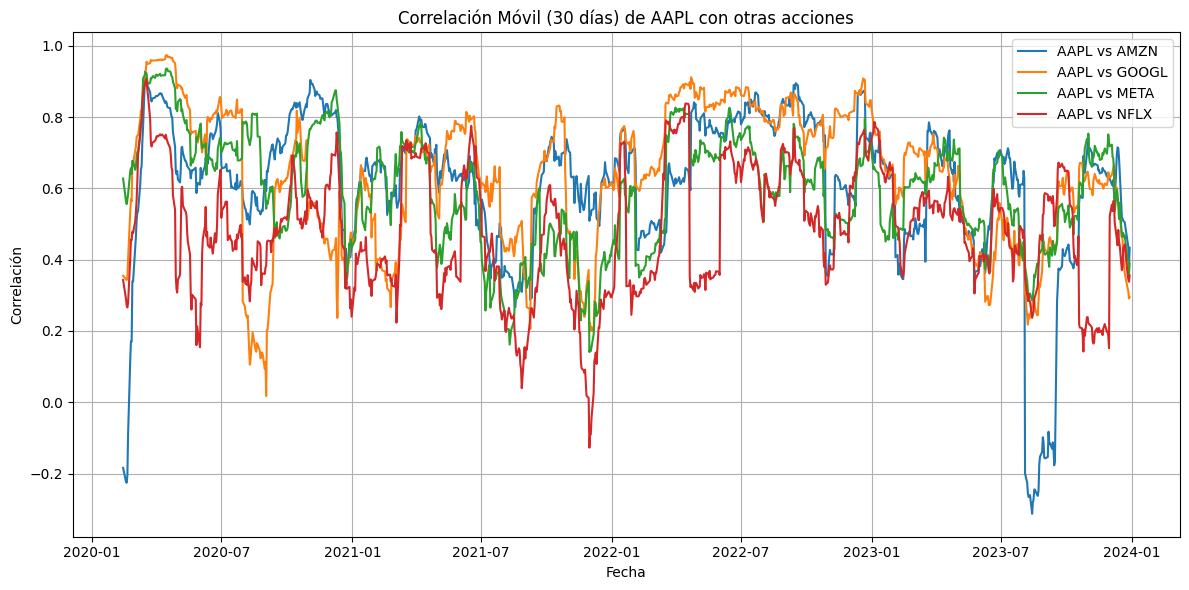

In [23]:
# Calcular la correlaci√≥n m√≥vil con una ventana de 30 d√≠as
rolling_corr = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].rolling(30).corr()

# Crear la figura
plt.figure(figsize=(12, 6))

# Graficar la correlaci√≥n de cada acci√≥n con AAPL
for stock in ['AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']:
    corr_series = rolling_corr.xs(stock, level=1)['AAPL_returns']
    plt.plot(corr_series.index, corr_series.values, label=f"AAPL vs {stock.replace('_returns', '')}")

plt.title("Correlaci√≥n M√≥vil (30 d√≠as) de AAPL con otras acciones")
plt.xlabel("Fecha")
plt.ylabel("Correlaci√≥n")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("correlacion_movil_AAPL.png", dpi=300)
plt.show()

In [24]:
# Crear la figura interactiva
fig = go.Figure()

# Agregar la correlaci√≥n m√≥vil de cada par con AAPL
for stock in ['AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']:
    rolling_corr_stock = rolling_corr.xs(stock, level=1)[['AAPL_returns']]

    fig.add_trace(go.Scatter(x=rolling_corr_stock.index, y=rolling_corr_stock['AAPL_returns'],
                             mode='lines', name=f"AAPL vs {stock.replace('_returns', '')}"))

# Configurar la gr√°fica interactiva
fig.update_layout(title="Correlaci√≥n M√≥vil (30 d√≠as) de AAPL con otras acciones",
                  xaxis_title="Fecha",
                  yaxis_title="Correlaci√≥n",
                  legend_title="Comparaci√≥n con AAPL",
                  hovermode="x unified")

fig.show()

Esperamos que para este momento, adem√°s de ver muchos ejemplos de como hacer un an√°lisis de riesgo "b√°sico", estemos mejor familiarizados con las gr√°ficas que muestran muchas aplicaciones de "bolsa" o algunos art√≠culos tanto cient√≠ficos como econ√≥micos. Aunque las cuentas no son complicadas, las interpretaciones de las gr√°ficas aveces pueden pasarnos por complicadas o en su contraparte obvias.

## An√°lisis del Portafolio

El an√°lisis de portafolio es el siguiente paso l√≥gico despu√©s de evaluar el riesgo de cada activo individualmente. En un an√°lisis de portafolio, simulas una inversi√≥n en distintas acciones y eval√∫as c√≥mo habr√≠a sido su rendimiento y riesgo. Esto te ayuda a tomar decisiones m√°s informadas antes de invertir dinero real. Aadema√°s, podemos aplicar conceptos como diversificaci√≥n, optimizaci√≥n de rendimiento y control de riesgo para construir un portafolio eficiente.

Para analizar un portafolio, podemos enfocarnos en: **composici√≥n del portafolio: Pesos de cada activo en la cartera**.

Para comenzar, asignamos pesos iguales a cada uno de los cinco activos, lo que significa que cada acci√≥n representa el 20% del total invertido:


In [25]:
weights = np.ones(len(stocks)) / len(stocks)
print(weights)

[0.2 0.2 0.2 0.2 0.2]


Una vez definidos los pesos de inversi√≥n en cada activo, podemos calcular el retorno esperado del portafolio como la suma ponderada de los rendimientos promedio diarios de cada acci√≥n:
$$\text{Retorno esperado del portafolio}=w^t\cdot r.$$
Donde $w$ es el vector de pesos, y $r$ el vector de rendimientos promedio.

In [26]:
# Retornos promedio dados anteriormente
avg_returns = np.array(avg_returns)

# Pesos del portafolio
weights = np.array(weights)

# Retorno esperado del portafolio
portfolio_return = np.dot(weights, avg_returns)

print(f"Retorno esperado del portafolio: {portfolio_return:.4f}")

Retorno esperado del portafolio: 0.0009


In [27]:
# Obtener matriz de covarianza de los retornos diarios
cov_matrix = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].cov()

# C√°lculo de la volatilidad del portafolio (desviaci√≥n est√°ndar)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
print(f"Volatilidad del portafolio: {portfolio_volatility:.4f}")

Volatilidad del portafolio: 0.0206


In [28]:
risk_free_rate = 0.0001  # Supongamos una tasa libre de riesgo del 0.01% diario
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
print(f"Ratio de Sharpe: {sharpe_ratio:.4f}")

Ratio de Sharpe: 0.0406


Esto indica que, por cada unidad de riesgo que est√°s asumiendo, obtienes una ganancia esperada neta muy baja, lo cual es com√∫n en an√°lisis diarios ‚Äîlos retornos diarios suelen ser peque√±os. Aun as√≠, este ratio te permite comparar portafolios entre s√≠ de forma justa.

In [29]:
import scipy.optimize as sco
num_assets = len(avg_returns)

# Funci√≥n de minimizaci√≥n de riesgo para un retorno objetivo
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Restricciones: La suma de los pesos debe ser 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# L√≠mites para los pesos (entre 0 y 1)
bounds = tuple((0, 1) for asset in range(num_assets))

# Optimizaci√≥n de portafolio
initial_guess = num_assets * [1. / num_assets]  # Pesos iniciales iguales
opt_result = sco.minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Pesos √≥ptimos
optimal_weights = opt_result.x
print("Pesos √≥ptimos del portafolio:", optimal_weights)

Pesos √≥ptimos del portafolio: [0.39855884 0.19003736 0.36893403 0.         0.04246977]


In [30]:
for i, stock in enumerate(stocks):
    print(f"{stock}: {optimal_weights[i]:.2%}")

AAPL: 39.86%
AMZN: 19.00%
GOOGL: 36.89%
META: 0.00%
NFLX: 4.25%


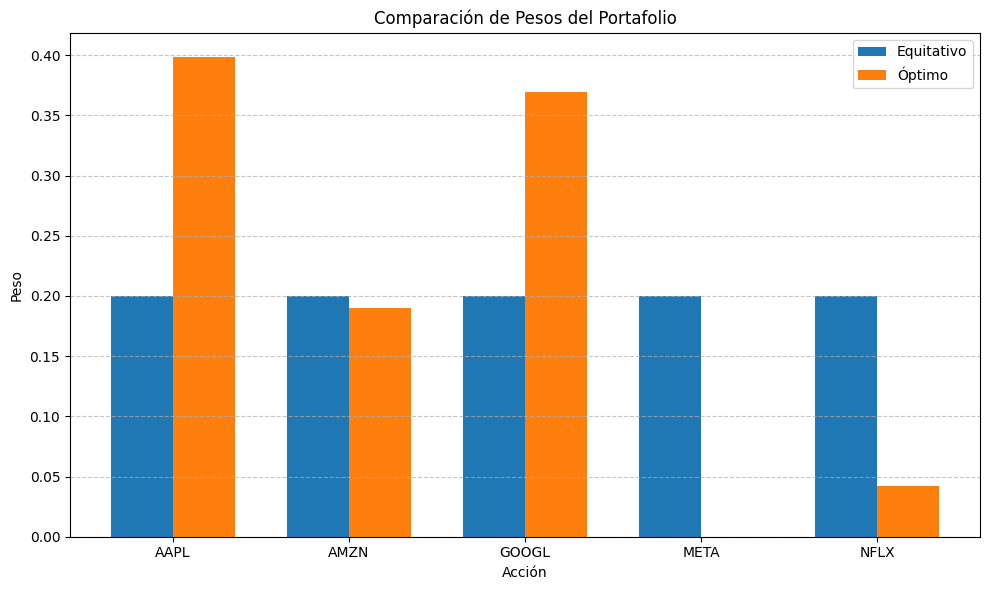

In [31]:
# Posici√≥n de las barras
x = np.arange(len(stocks))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Barras
bars1 = ax.bar(x - width/2, weights, width, label='Equitativo')
bars2 = ax.bar(x + width/2, optimal_weights, width, label='√ìptimo')

# Personalizaci√≥n
ax.set_title('Comparaci√≥n de Pesos del Portafolio')
ax.set_xlabel('Acci√≥n')
ax.set_ylabel('Peso')
ax.set_xticks(x)
ax.set_xticklabels(stocks)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar y guardar
plt.tight_layout()
plt.savefig("comparacion_pesos_portafolio.png", dpi=300)
plt.show()

In [32]:
fig = go.Figure()

fig.add_trace(go.Bar(x=stocks, y=weights, name="Equitativo"))
fig.add_trace(go.Bar(x=stocks, y=optimal_weights, name="√ìptimo"))

fig.update_layout(title="Comparaci√≥n de Pesos del Portafolio",
                  barmode='group', yaxis_title="Peso")
fig.show()

In [33]:
# Calcular nuevo retorno esperado
optimized_return = np.dot(optimal_weights, avg_returns)

# Calcular nueva volatilidad del portafolio
optimized_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

# Calcular nuevo Ratio de Sharpe
optimized_sharpe = (optimized_return - risk_free_rate) / optimized_volatility

print(f"Nuevo Retorno esperado: {optimized_return:.4f}")
print(f"Nueva Volatilidad del portafolio: {optimized_volatility:.4f}")
print(f"Nuevo Ratio de Sharpe: {optimized_sharpe:.4f}")

Nuevo Retorno esperado: 0.0010
Nueva Volatilidad del portafolio: 0.0191
Nuevo Ratio de Sharpe: 0.0464


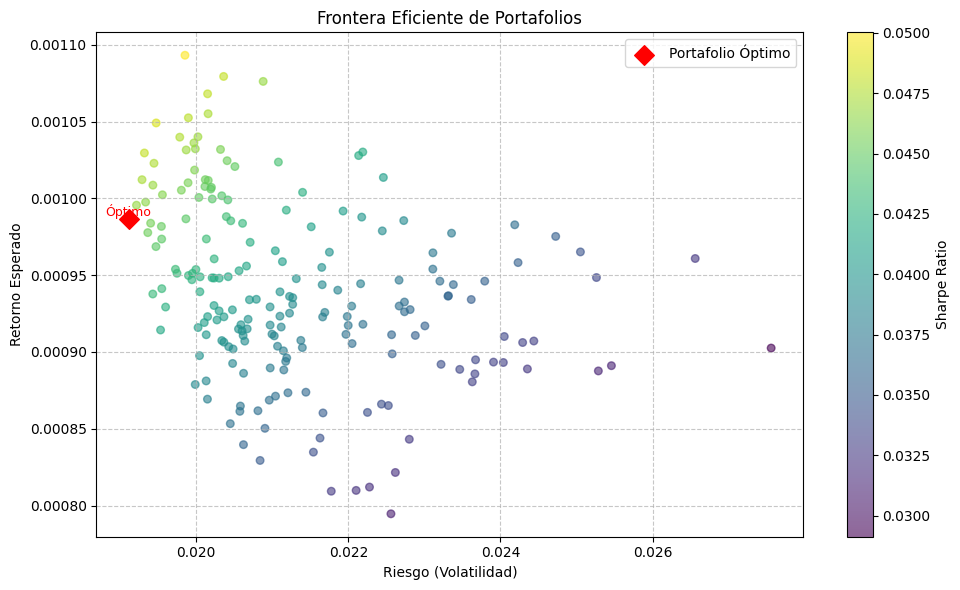

In [34]:
n_portfolios = 200
results = {'Return': [], 'Volatility': [], 'Sharpe Ratio': [], 'Weights': []}

for _ in range(n_portfolios):
    weights = np.random.dirichlet(np.ones(num_assets), size=1)[0]
    port_return = np.dot(weights, avg_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (port_return - risk_free_rate) / port_vol
    results['Return'].append(port_return)
    results['Volatility'].append(port_vol)
    results['Sharpe Ratio'].append(sharpe)
    results['Weights'].append(weights)

# Convertir a DataFrame
portfolios_df = pd.DataFrame(results)

# Datos de frontera eficiente
returns = portfolios_df['Return']
volatilities = portfolios_df['Volatility']
sharpes = portfolios_df['Sharpe Ratio']

# Crear figura
plt.figure(figsize=(10, 6))
sc = plt.scatter(volatilities, returns, c=sharpes, cmap='viridis', alpha=0.6, s=30)
plt.colorbar(sc, label='Sharpe Ratio')

# A√±adir el portafolio √≥ptimo
plt.scatter(optimized_volatility, optimized_return, color='red', marker='D', s=100, label='Portafolio √ìptimo')
plt.text(optimized_volatility, optimized_return, "√ìptimo", fontsize=9, ha='center', va='bottom', color='red')

# T√≠tulos y etiquetas
plt.title('Frontera Eficiente de Portafolios')
plt.xlabel('Riesgo (Volatilidad)')
plt.ylabel('Retorno Esperado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Guardar y mostrar
plt.tight_layout()
plt.savefig("frontera_eficiente_portafolios.png", dpi=300)
plt.show()

In [35]:
# Calcular m√©tricas del portafolio √≥ptimo
optimal_return = np.dot(optimal_weights, avg_returns)
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
optimal_sharpe = (optimal_return - risk_free_rate) / optimal_volatility

# Crear figura base con plotly express
fig = px.scatter(portfolios_df, x='Volatility', y='Return',
                 color='Sharpe Ratio',
                 title='Frontera Eficiente de Portafolios',
                 hover_data=['Sharpe Ratio'])

# A√±adir el portafolio √≥ptimo
fig.add_trace(go.Scatter(
    x=[optimal_volatility],
    y=[optimal_return],
    mode='markers+text',
    marker=dict(color='red', size=12, symbol='diamond'),
    name='Portafolio √ìptimo',
    text=["√ìptimo"],
    textposition="top center"
))

# Ajustes visuales
fig.update_layout(
    xaxis_title='Riesgo (Volatilidad)',
    yaxis_title='Retorno Esperado'
)

fig.show()

Cada punto es un portafolio aleatorio con una combinaci√≥n distinta de pesos.

El color indica el valor del Sharpe Ratio.

Puedes pasar el cursor sobre un punto para ver detalles.

Los portafolios m√°s "eficientes" estar√°n m√°s arriba (mayor retorno) y m√°s a la izquierda (menor riesgo), y con Sharpe m√°s alto.

## Utilizando rede neuronales.

Veamos un modelo de red neuronal.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AAPL           1006 non-null   float64
 1   AMZN           1006 non-null   float64
 2   GOOGL          1006 non-null   float64
 3   META           1006 non-null   float64
 4   NFLX           1006 non-null   float64
 5   AAPL_returns   1005 non-null   float64
 6   AMZN_returns   1005 non-null   float64
 7   GOOGL_returns  1005 non-null   float64
 8   META_returns   1005 non-null   float64
 9   NFLX_returns   1005 non-null   float64
 10  AAPL_mean      976 non-null    float64
 11  AAPL_std       976 non-null    float64
 12  AAPL_upper     976 non-null    float64
 13  AAPL_lower     976 non-null    float64
dtypes: float64(14)
memory usage: 117.9 KB


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selecci√≥n de columnas de retornos
returns = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].dropna()

# Par√°metros
n_steps = 30  # d√≠as pasados usados como entrada
n_features = returns.shape[1]  # n√∫mero de acciones

# Crear ventanas de datos
X, y = [], []
for i in range(len(returns) - n_steps):
    X.append(returns.iloc[i:i+n_steps].values)
    y.append(returns.iloc[i+n_steps].values)
X, y = np.array(X), np.array(y)

# Aplanar entrada para usar MLP (para LSTM no se aplana)
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])


# Escaladores separados
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
# Separar en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(n_features)  # Salida multivariada
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 15ms/step - loss: 1.4202 - val_loss: 1.3122
Epoch 2/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.9694 - val_loss: 1.3334
Epoch 3/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 0.9392 - val_loss: 1.3518
Epoch 4/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.8289 - val_loss: 1.3611
Epoch 5/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 0.7089 - val_loss: 1.4047
Epoch 6/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.5361 - val_loss: 1.4520
Epoch 7/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.4938 - val_loss: 1.4814
Epoch 8/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.4057 - val_loss: 1.5389

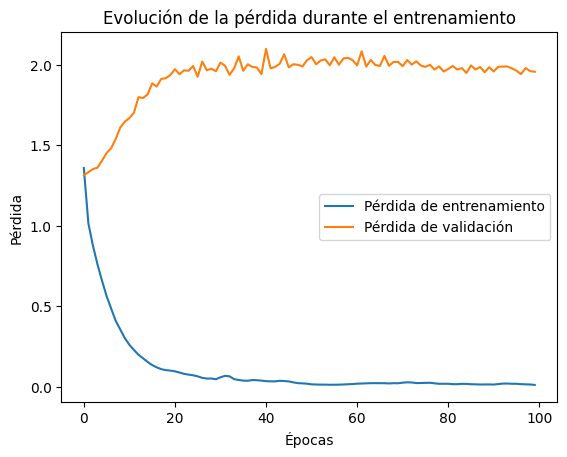

In [38]:
# Suponiendo que tu historial se guard√≥ en la variable 'history'
plt.plot(history.history['loss'], label='P√©rdida de entrenamiento')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='P√©rdida de validaci√≥n')
plt.title('Evoluci√≥n de la p√©rdida durante el entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.legend()
plt.show()

### Interpretaci√≥n de la gr√°fica
1. Diferencia entre loss y val_loss

  Si la val_loss es mucho m√°s alta que la loss de entrenamiento (como hemos visto en tu caso), es una se√±al clara de sobreajuste.

  Si ambas curvas est√°n descendiendo y se estabilizan cerca, el modelo est√° generalizando bien.

2. Curvatura de las p√©rdidas

  Si la loss baja r√°pidamente al inicio y luego se aplana, significa que el modelo aprende r√°pido pero llega a un punto donde las mejoras son marginales.

  Si la val_loss empieza a aumentar despu√©s de algunas √©pocas, entonces el modelo est√° memorizando el entrenamiento y es momento de aplicar Early Stopping.

In [39]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Selecci√≥n de datos
returns = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].dropna()

# Par√°metros
n_steps = 30
n_features = returns.shape[1]

# Crear ventanas de datos
X, y = [], []
for i in range(len(returns) - n_steps):
    X.append(returns.iloc[i:i+n_steps].values)
    y.append(returns.iloc[i+n_steps].values)
X, y = np.array(X), np.array(y)

# Aplanar entrada para usar MLP
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

# Escalado con MinMaxScaler para estabilidad
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Early stopping para detener cuando la validaci√≥n deja de mejorar
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modelo ajustado
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Regularizaci√≥n
    Dense(32, activation='relu'),
    Dropout(0.2),  # Otro Dropout para estabilidad
    Dense(n_features)
])

# Compilar con tasa de aprendizaje m√°s baja
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')

# Entrenamiento con validaci√≥n y Early Stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 16ms/step - loss: 0.5292 - val_loss: 0.1740
Epoch 2/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 0.2893 - val_loss: 0.1418
Epoch 3/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 0.2255 - val_loss: 0.1137
Epoch 4/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.1960 - val_loss: 0.0995
Epoch 5/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.1893 - val_loss: 0.1173
Epoch 6/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.1755 - val_loss: 0.0891
Epoch 7/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.1620 - val_loss: 0.1098
Epoch 8/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.1538 - val_loss: 0.0847
Epoch 9/100

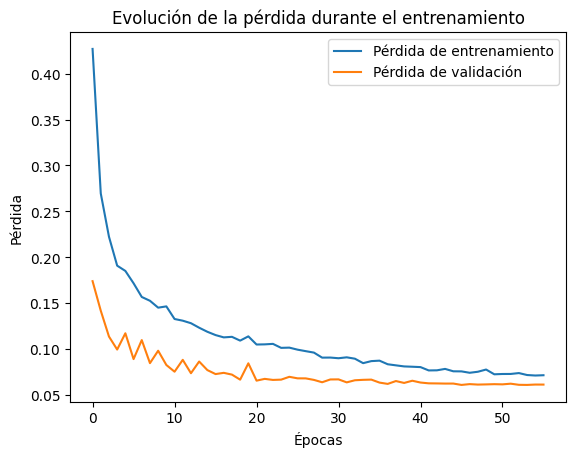

In [40]:
#Graficar la evoluci√≥n de la p√©rdida
plt.plot(history.history['loss'], label='P√©rdida de entrenamiento')
plt.plot(history.history['val_loss'], label='P√©rdida de validaci√≥n')
plt.title('Evoluci√≥n de la p√©rdida durante el entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.legend()
plt.show()

Ahora el modelo est√° aprendiendo de manera m√°s equilibrada y generalizando mejor sin sobreajustarse.

Si ambas curvas de p√©rdida son paralelas al final y descienden juntas, significa que los ajustes funcionaron: el modelo no solo est√° memorizando los datos de entrenamiento, sino que tambi√©n puede hacer predicciones m√°s confiables sobre datos nuevos.

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step


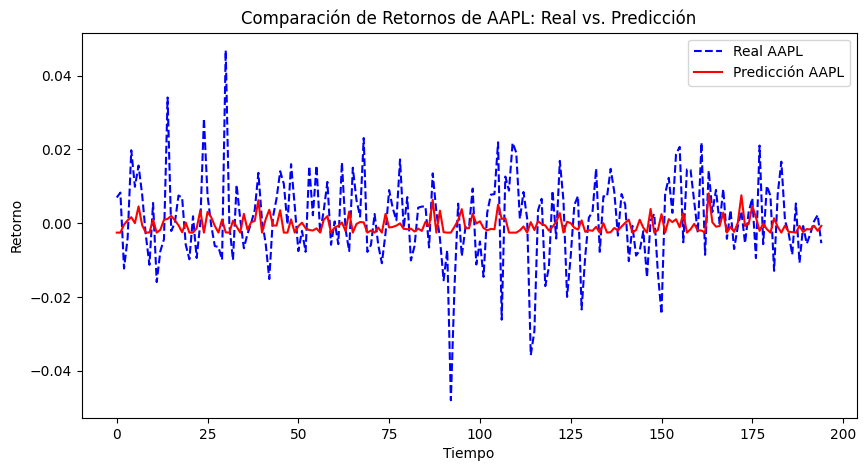

In [41]:
y_pred = model.predict(X_test)

# Invertir la escala para obtener valores originales
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

# Graficar predicciones vs. valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_original[:, 0], label="Real AAPL", linestyle="dashed", color="blue")
plt.plot(y_pred_original[:, 0], label="Predicci√≥n AAPL", color="red")
plt.title("Comparaci√≥n de Retornos de AAPL: Real vs. Predicci√≥n")
plt.xlabel("Tiempo")
plt.ylabel("Retorno")
plt.legend()
plt.show()

Qu√© podemos observar:

Como hay diferencias grandes o la predicci√≥n es demasiado plana, podr√≠amos ajustar el modelo con m√°s datos o mejorar la arquitectura. Uno puede jugar con los par√°metros para ver si el modelo mejora, pero la diferencia entre las curvas es tanta que es mejor cambiar de modelo. Uno que este mas adecuado a series de tiempo.

In [42]:
from tensorflow.keras.layers import LSTM
# Selecci√≥n de datos
returns = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].dropna()

# Par√°metros
n_steps = 30
n_features = returns.shape[1]

# Crear ventanas de datos
X, y = [], []
for i in range(len(returns) - n_steps):
    X.append(returns.iloc[i:i+n_steps].values)
    y.append(returns.iloc[i+n_steps].values)
X, y = np.array(X), np.array(y)

# Mantener la forma 3D para LSTM
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Escalado con StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y)

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Modelo LSTM optimizado
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.1),
    Dense(n_features)
])

# Compilar con tasa de aprendizaje ajustada
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')

# Entrenar con validaci√≥n y Early Stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 115ms/step - loss: 0.6858 - val_loss: 0.7499
Epoch 2/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 65ms/step - loss: 0.7284 - val_loss: 0.7494
Epoch 3/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 64ms/step - loss: 0.7299 - val_loss: 0.7500
Epoch 4/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 72ms/step - loss: 0.7143 - val_loss: 0.7497
Epoch 5/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 67ms/step - loss: 0.7311 - val_loss: 0.7499
Epoch 6/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 79ms/step - loss: 0.7092 - val_loss: 0.7491
Epoch 7/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 108ms/step - loss: 0.7098 - val_loss: 0.7497
Epoch 8/100
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 65ms/step - loss: 0.7426 - val_loss: 0.7498
Ep

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 75ms/step


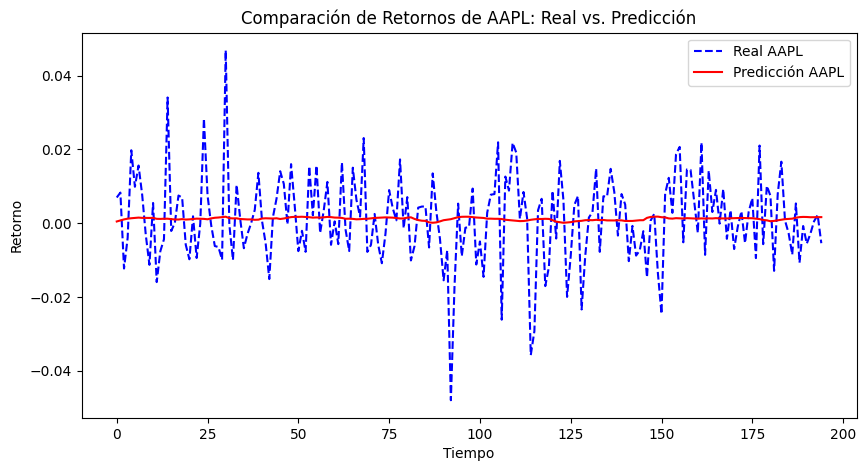

In [43]:
y_pred = model.predict(X_test)

# Invertir la escala para obtener valores originales
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

# Graficar comparaci√≥n de una acci√≥n (ejemplo: AAPL)
plt.figure(figsize=(10, 5))
plt.plot(y_test_original[:, 0], label="Real AAPL", linestyle="dashed", color="blue")
plt.plot(y_pred_original[:, 0], label="Predicci√≥n AAPL", color="red")
plt.title("Comparaci√≥n de Retornos de AAPL: Real vs. Predicci√≥n")
plt.xlabel("Tiempo")
plt.ylabel("Retorno")
plt.legend()
plt.show()

In [53]:
from tensorflow.keras.layers import GRU
# Selecci√≥n de datos
returns = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].dropna()

# Par√°metros
n_steps = 15
n_features = returns.shape[1]

# Crear ventanas de datos
X, y = [], []
for i in range(len(returns) - n_steps):
    X.append(returns.iloc[i:i+n_steps].values)
    y.append(returns.iloc[i+n_steps].values)
X, y = np.array(X), np.array(y)

# Escalado
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y)

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Modelo GRU
model = Sequential([
    GRU(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    Dropout(0.2),
    GRU(64, activation='relu'),
    Dropout(0.1),
    Dense(n_features)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# Entrenamiento
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.1, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 65ms/step - loss: 1.1023 - val_loss: 1.0583
Epoch 2/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 35ms/step - loss: 1.0481 - val_loss: 1.0577
Epoch 3/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 35ms/step - loss: 1.1857 - val_loss: 1.0588
Epoch 4/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 38ms/step - loss: 1.0956 - val_loss: 1.0552
Epoch 5/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 39ms/step - loss: 1.1593 - val_loss: 1.0551
Epoch 6/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 58ms/step - loss: 1.1731 - val_loss: 1.0516
Epoch 7/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 37ms/step - loss: 1.1163 - val_loss: 1.0549
Epoch 8/100
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 33ms/step - loss: 1.2241 - val_loss:

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 80ms/step


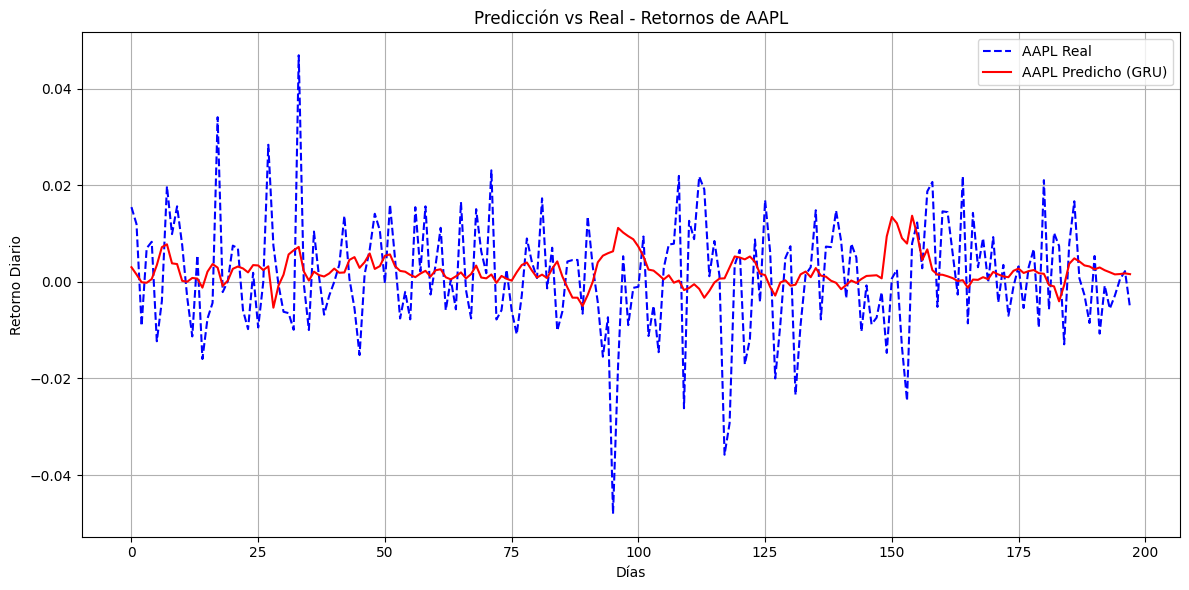

In [54]:
# Predicciones
y_pred_scaled = model.predict(X_test)

# Desescalar
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Selecci√≥n para AAPL (columna 0)
plt.figure(figsize=(12, 6))
plt.plot(y_true[:, 0], label='AAPL Real', linestyle='dashed', color='blue')
plt.plot(y_pred[:, 0], label='AAPL Predicho (GRU)', color='red')
plt.title('Predicci√≥n vs Real - Retornos de AAPL')
plt.xlabel('D√≠as')
plt.ylabel('Retorno Diario')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()